Intro Titanic Ship Dataset

- By rishabh kuletha
- Github - https://github.com/kuletha-rk
- LinkedIn - https://www.linkedin.com/in/rishabh-kuletha-195375179/

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Before applying any ML algorithms in data, we need to understand the data which we are going to follow. Without data understanding there will be a possibility of ML model failure. The understanding of data is nothing but this EDA.


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


In [2]:
#Reading data

df = pd.read_csv('/Users/rishabh/Downloads/Rishabh - train.csv')

In [3]:
# Information about my df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observations from .info()

***'Age'*** has 714, have 177 ~ 20% of total values in  Age are null.

***'Cabin*** has 77% null values. Since this is an object which implies this
data might have details about Cabin Names, which if useful would be taken further.


Now , we will approach each data type starting from ***int64**

In [4]:
# Identifying variables with integer datatype

df.dtypes[df.dtypes == 'int64']

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

Observations:

1. **PassengerID** represents unique numbers,they're okay as integers.

2. **Survived** 1 means survived and 0 means non survived. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.

3. **Pclass** There are three different tiers for customer, I,II,III. For comparison, they too **needs to be converted to category datatype**.

4. **SibSp** represents number of siblings and or spouses with respective PassengerId. Value ranges from 0 to 8. This **needs to be converted to category datatype**.

5. **Parch** reperesents number of parents/children aboard. Values range from 0 to 6. This **needs to be converted to category datatype**.

In [5]:
# converting to category
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')
df.dtypes[df.dtypes == 'int64']

PassengerId    int64
dtype: object

### Float

In [6]:
# Identifying variables with float datatype
df.dtypes[df.dtypes == 'float64']

Age     float64
Fare    float64
dtype: object

Observations:

1. **Age** is supposed to be whole number, but maybe there are infants below 1 year old who would be represented by decimal values. In order to avoid data loss, not changing Age to int.

2. **Fare** can be a float value. No changes here too.

### Object Data type

In [7]:
# Identifying variables with object datatype
df.dtypes[df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Observations:

1. **Sex** belongs to object, need to convert it to category.

2. **Embarked** also belongs to category.

In [8]:
#Converting obj datatypes to category variable:

df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

#Check:
df[['Sex','Embarked']].dtypes


Sex         category
Embarked    category
dtype: object

In [9]:
# Visualising how table looks:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Find out the Numerical Columns Basic Statistics: Selecting 'int' and 'float' data types to work on with.


numerical_cols = df.select_dtypes(include=['int64', 'float64', ]).columns

#Visualizing changes:

numerical_cols

# Further I will perform Basic Statistics on -  'Pclass' , 'Age', 'SibSp', 'Parch' , 'Fare'

Index(['PassengerId', 'Age', 'Fare'], dtype='object')

In [11]:
# seggregating variables into groups
numerical_univ = ['Age', 'Fare']

# Univariate Analysis w.r.t. numerical variables

In [12]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(df, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-df[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(df[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

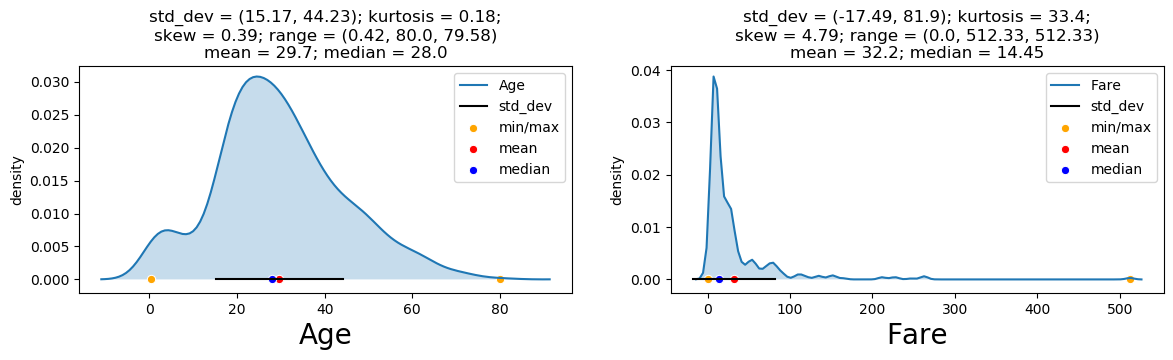

In [13]:
UVA_numeric(df,numerical_univ)

**Summary of numerical_univ:**

*    **Age**:
    *    Median Age = 28
    *    **Most customers age between 15 to 44**
    *    skewness +0.39 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = 0.18**; very less likely to have extreme/outlier values.
    *    Age has missing values, only 714 out of 891 values are populated.
*    **Fare:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Proceeding while keeping these points in mind:**
*    **high fare distribution** in Fare variable.

*    **Age has missing Values**

## Univariate Analysis : Categorical Varibales


In [14]:
df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

Survived    category
Pclass      category
Name          object
Sex         category
SibSp       category
Parch       category
Ticket        object
Cabin         object
Embarked    category
dtype: object

**Grouping Varibales**

* **passenger_info**: Sex, SibSp, Parch, Pclass
* **Survived**

In [15]:
def UVA_category(df, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = df[i].value_counts(normalize = True)
    n_uni = df[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

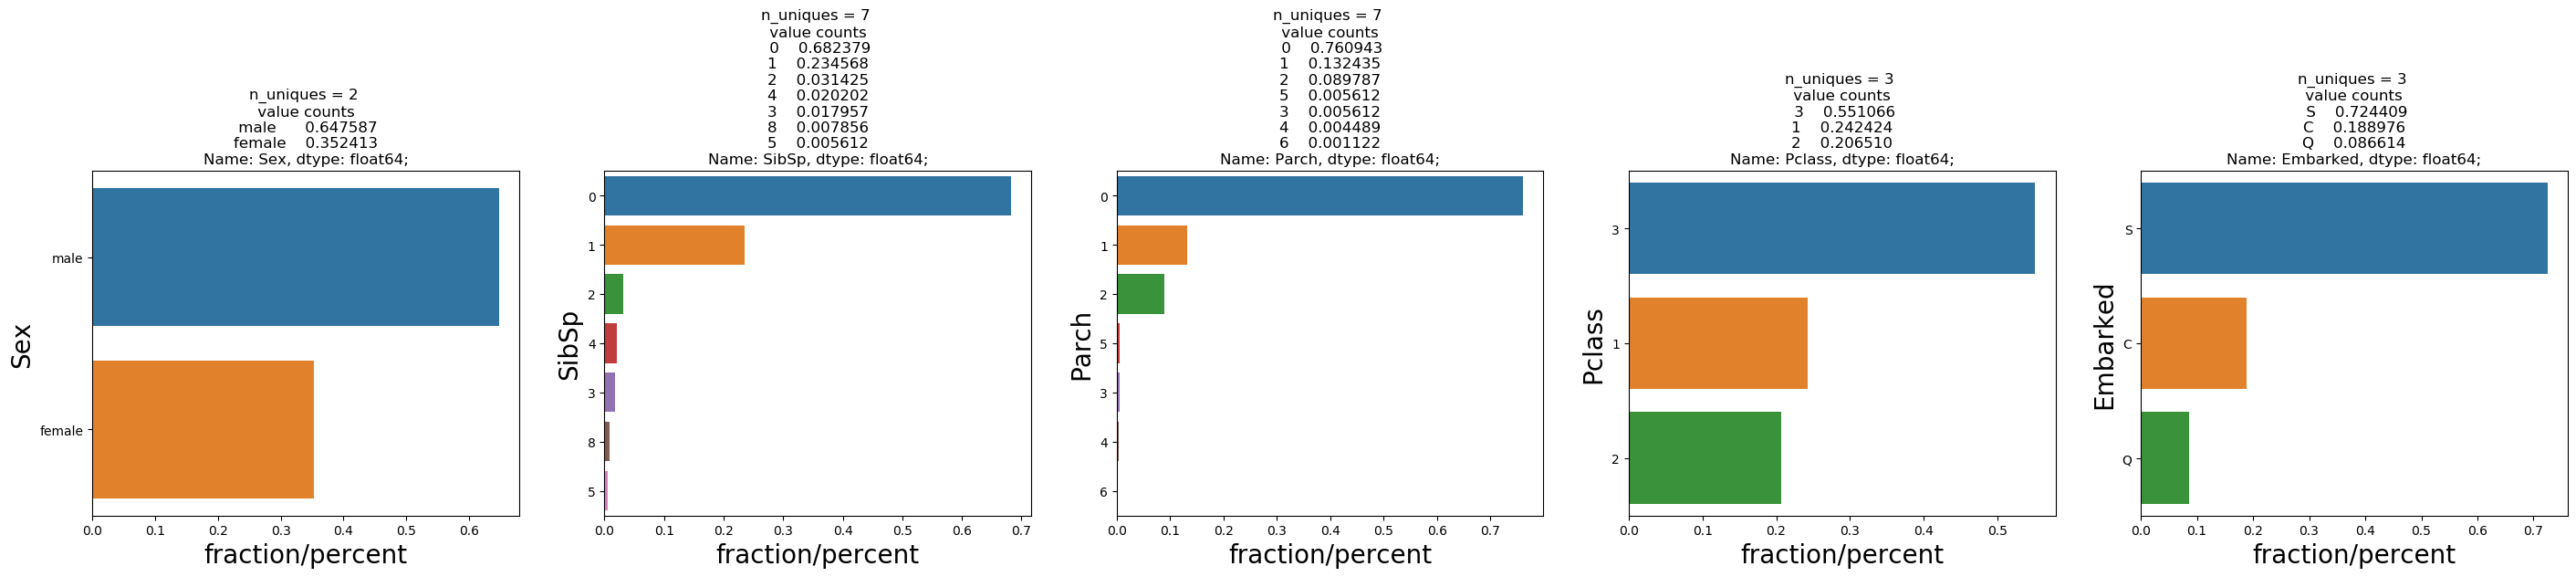

In [16]:
UVA_category(df,['Sex','SibSp', 'Parch','Pclass','Embarked'])

**Summary**
* Sex
  * Male constitutes 64.72%.
  * Female constitutes 35.24%.

* SibSp:
  *  Majority of passengers = 68.23% are travelling solo.
  *  23 % passengers are with either a sibling or a spouse.

* Parch:
  *  76 % passengers are travelling without Parents or Children

* Pclass:
  * 55 % of total travellers are in class III. This might suggest that the fare is chepaer in class iii.
  * 20% of total passengers are in Class II.
  * 24% of total passengers are in Class I.
  
* Embarked:
  * 72.4% of passengers have boarded RMS Titanic from point S. This might be the starting point of journey.
  * 18 % of passengers have boarded RMS Titanic from C
  * 8.6% of passengers have boarded RMS Titanic form Q


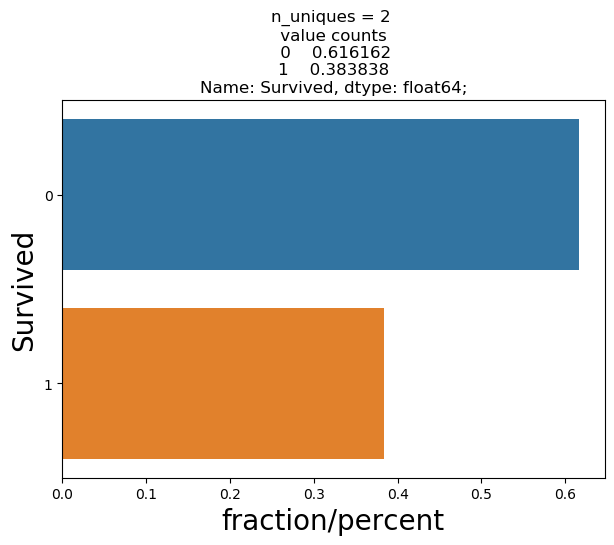

In [17]:
UVA_category(df, ['Survived'])

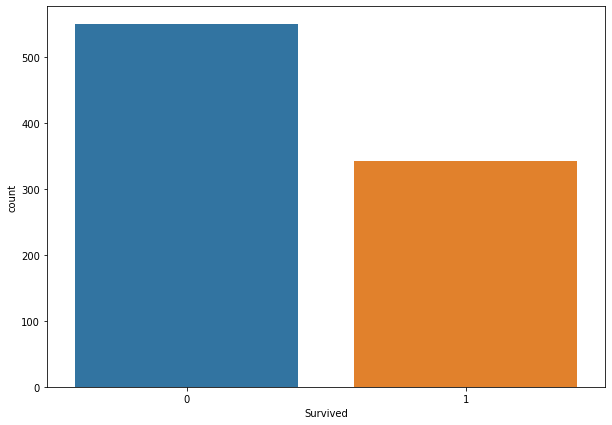

In [18]:
# What is the Count of Survived vs Not Survived?

plt.figure(figsize = (10,7))
sns.countplot(x = 'Survived', data = df)
plt.show()

In [19]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observations:

- Unfortunately, out of 891 passenger , 342 could survive. A mere 38.38% Survival rate

- Rest 549 could not survive.


3    491
1    216
2    184
Name: Pclass, dtype: int64

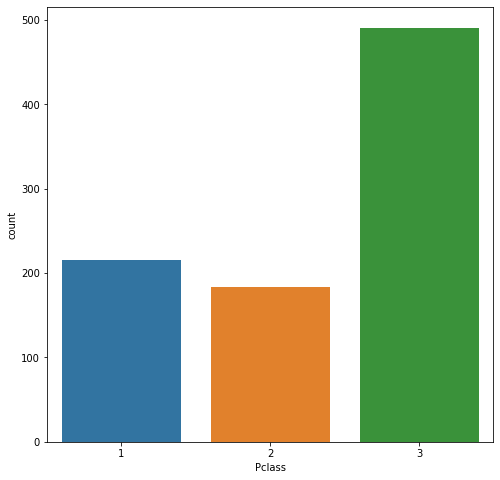

In [20]:
# Basic Statistics on 'Pclass'

plt.figure(figsize = (8,8))
sns.countplot('Pclass', data = df)

# Counting individually

df['Pclass'].value_counts()

Observations: 

1. As expected, number of passengers travelling in Class III are highest(491) followed by Class I(216) and ClassII(184).

2. Maybe, Class III ticket was cheaper with more occupancy.

In [21]:
# Basic Statistics on 'Age'

df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


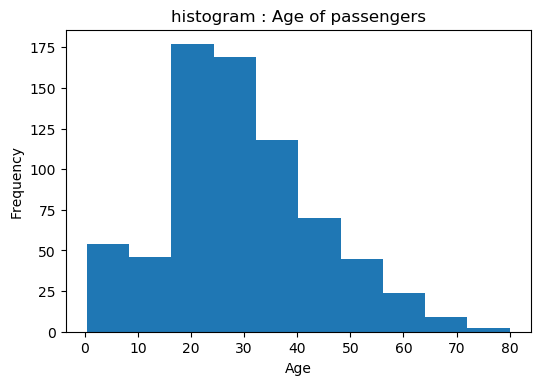

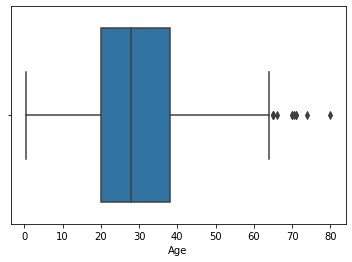

In [22]:
# Plotting histogram for 'Age'

plt.figure(dpi = 100)
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title("histogram : Age of passengers")
plt.show()

# Categorical variable

sns.boxplot(df['Age'])

Observation:

1. "Age" has missing values. ~ 20% values regarding ages is missing.
2. As we are restircting this to EDA, we will ignore this for the moment.

3. Majority of passengers are within 18 to 38 years.

4. We see outliers above 62 years.

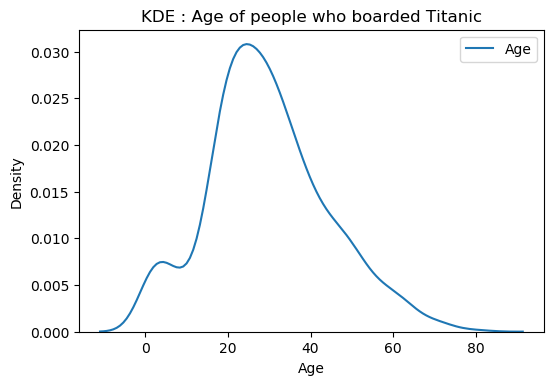

In [23]:
# plotting KdE for 'Age' using Seaborn

plt.figure(dpi = 100)
sns.kdeplot(df['Age'], shade = False)
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE : Age of people who boarded Titanic")
plt.show()

Observations from KDE for 'Age'

1. The probability of any passenger being in age group between 20 years and 40 years is higher than someone in 60 years and 80 years age group.

2. Visible clearly in KDE plot.

In [24]:
# Basic Statistics on 'Fare'

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

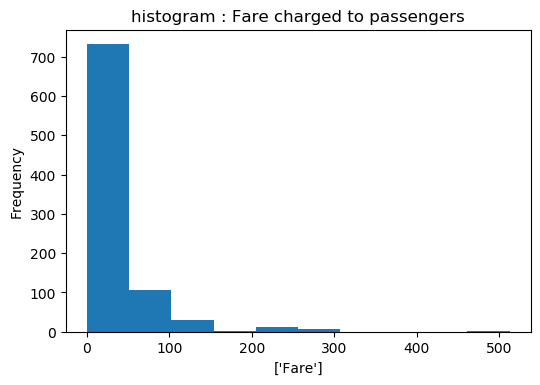

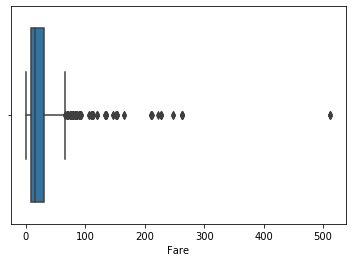

In [25]:
# Plotting histogram for 'Fare'

plt.figure(dpi = 100)
plt.hist(df['Fare'])
plt.xlabel(['Fare'])
plt.ylabel('Frequency')
plt.title("histogram : Fare charged to passengers")
plt.show()

# Plotting 'Fare' boxplot:

sns.boxplot('Fare' , data = df)

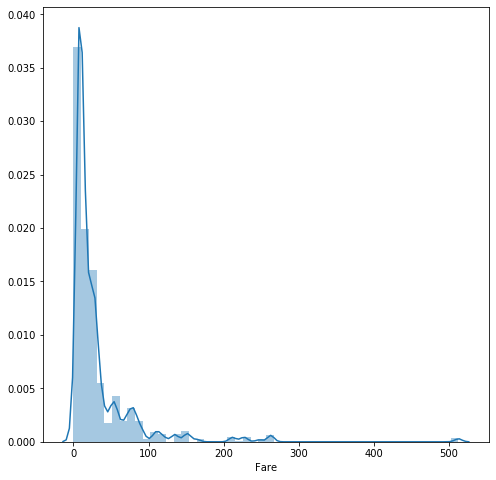

In [26]:
# Visual EDA for single Continuous Column: "Fare" using Distribution Plot

plt.figure(figsize = (8,8))
sns.distplot(df['Fare'])
plt.show()

Observations:

1. Fare under $100 has highest frequecy. 

2. We also see maximum fare at $512.

3. Lots of Outliers present in our data. Definitely not a normal distribution family member.

4. Coorelation will give a better picture later on.

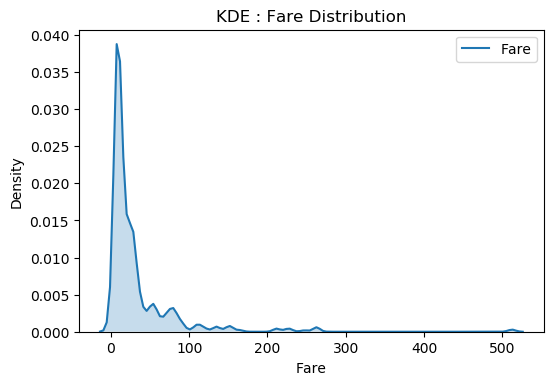

In [27]:
# Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

plt.figure(dpi = 100)
sns.kdeplot(df['Fare'], shade = True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE : Fare Distribution')
plt.show()

Observations:

1. KDE for 'Fare' distribution shows high probability for fare between 0 and 50 .

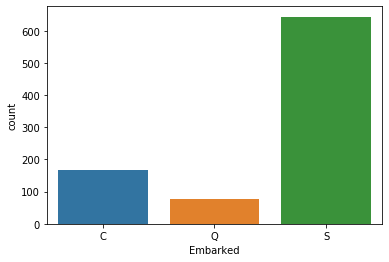

In [28]:
# Visual EDA for single Categorical Column: "Embarked"

sns.countplot('Embarked' ,  data = df)

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Observations:

1. 'S' category station witnessed most Embarkments(644) followed by C(168) and Q(77).

2. Any further conclusion can be brougt after looking at coorelation.

In [30]:
# Univariate on SibSp: Sibling/Spouse

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

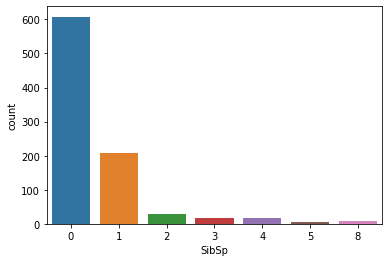

In [31]:
sns.countplot(x = 'SibSp', data = df)

#observations:

1. Most passengers 608 are travelling without siblings or spouse.
2. 283 passengers have at least 1 or more than 1 siblings or spouse.


## Bivariate Analysis : Numerical-Numerical

In [32]:
# isolating numerical dtypes

numerical = df.select_dtypes(include=['float64'])[:]
numerical.dtypes

Age     float64
Fare    float64
dtype: object

In [33]:
# checking for correlation

correlation = numerical.dropna().corr()
correlation

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


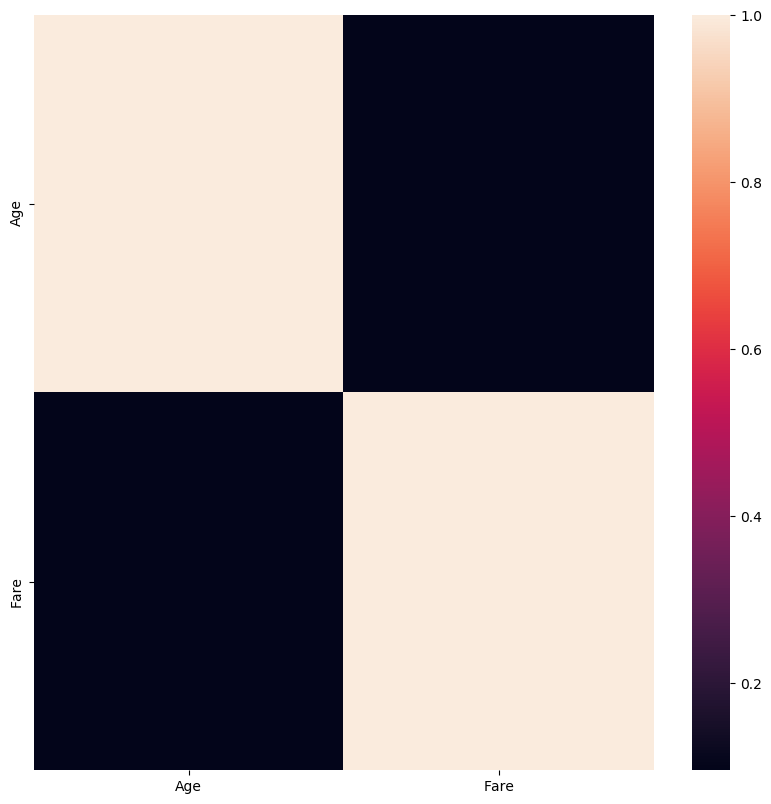

In [34]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(10,10), dpi=100)

sns.heatmap(numerical.corr())

# Scatterplot

In [35]:
# Grouping variables

Age_Fare = ['Age', 'Fare'] 

<Figure size 840x560 with 0 Axes>

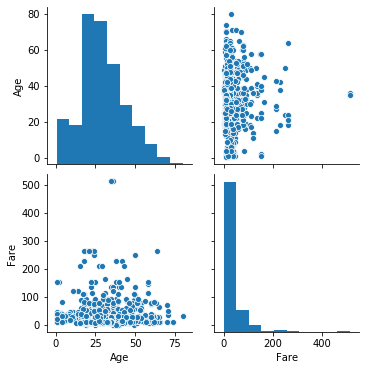

In [36]:
# scatter plot for Age_Fare

plt.figure(dpi=140)
sns.pairplot(numerical[Age_Fare])

Observations:

1. ***Age*** and ***Fare*** show high positive correlation of 0.96 value. But fare seems Concentrated under 150, which implies increase in age doesn't corresponds directly with increase in Fare.

2. Looking at scatterplot, it looks highest paying **Fare** is a passenger between 25 and 30 years of age.

#ask sachin/shreyas


 ***Bivariate Analysis***: Continuous-Categorical variables


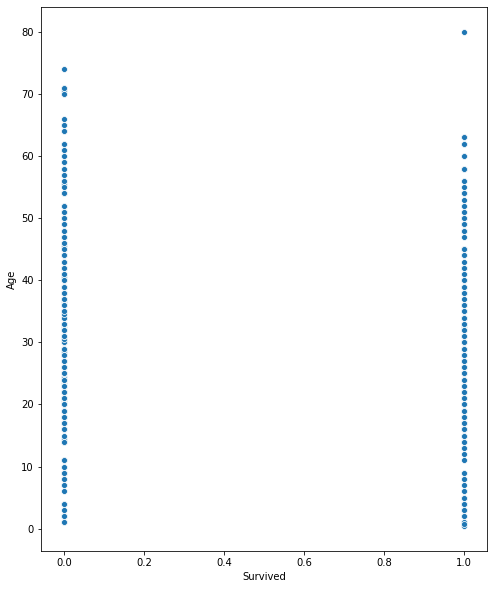

In [37]:
# Age vs Survived

plt.figure(figsize=(8,10))
sns.scatterplot(x = 'Survived', y = 'Age', data = df)

In [38]:
# creating bins for Age and then plotting a graph:

df['Age_bins'] = pd.cut(x = df['Age'], bins=[1,9,19,29,39,49,59,69,79,89])

In [39]:
df.groupby('Survived') ['Age_bins'].value_counts()

Survived  Age_bins    
0         (19.0, 29.0]    143
          (29.0, 39.0]     94
          (9.0, 19.0]      61
          (39.0, 49.0]     55
          (49.0, 59.0]     28
          (1.0, 9.0]       22
          (59.0, 69.0]     13
          (69.0, 79.0]      6
1         (19.0, 29.0]     77
          (29.0, 39.0]     73
          (9.0, 19.0]      41
          (39.0, 49.0]     34
          (1.0, 9.0]       26
          (49.0, 59.0]     20
          (59.0, 69.0]      6
          (79.0, 89.0]      1
Name: Age_bins, dtype: int64

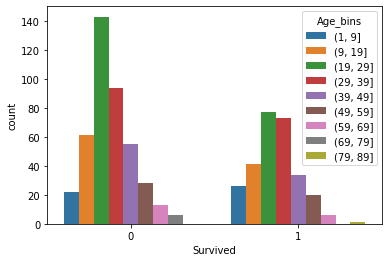

In [40]:
df_new = pd.DataFrame(df, columns = ['Age_bins', 'Survived'])

sns.countplot(x = 'Survived',hue = 'Age_bins', data = df_new)

Observations:

* Non Survivability : 22+61+143+94+55+28+13+6 = 422

 Most Vulnerable age group - 
 
         1 to 9 years old        05.21%
         
         9 to 19 years old       14.45%
         
         19 to 29 years old      33.88%
         
         29 to 39 years old      22.27%
         
         39 to 49 years old      13.03%
         
         49 to 59 years old      06.63%
         
         59 to 69 years old      03.08%
         
         69 to 79 years old      01.42%
         
* Survivability : 26+41+77+73+34+20+6+1  = 278

 Suitable age group to survive-
 
          1 to 9 years old       09.35%
          
          9 to 19 years old      14.74%
          
          19 to 29 years old     27.69%
          
          29 to 39 years old     26.25%
          
          39 to 49 years old     12.23%
          
          49 to 59 years old     07.19%
          
          59 to 69 years old     02.15%
          
          79 to 89 years old     00.35%

Observations:

1. Top age group to survive is 19 to 29 and 29 to 39 year old.

2. Maximum non surviving group is also 19 to 29 year old.

In [41]:
# What is the count of Males and Females Survived and Not Survived in each Class?

df.groupby(["Pclass" ,"Sex", "Survived" ]).size()

# unable to plot since there are subsets within the column, so creating a Non Surviver df

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

In [42]:
df_ns1 = df[df['Survived'] == 0]
df_s2 = df[df['Survived'] == 1]

In [43]:
df_ns1['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [44]:
# Not survived Count

df_ns1.groupby('Pclass')['Sex'].value_counts()


Pclass  Sex   
1       male       77
        female      3
2       male       91
        female      6
3       male      300
        female     72
Name: Sex, dtype: int64

In [45]:
# Survived Count:

df_s2.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Sex, dtype: int64

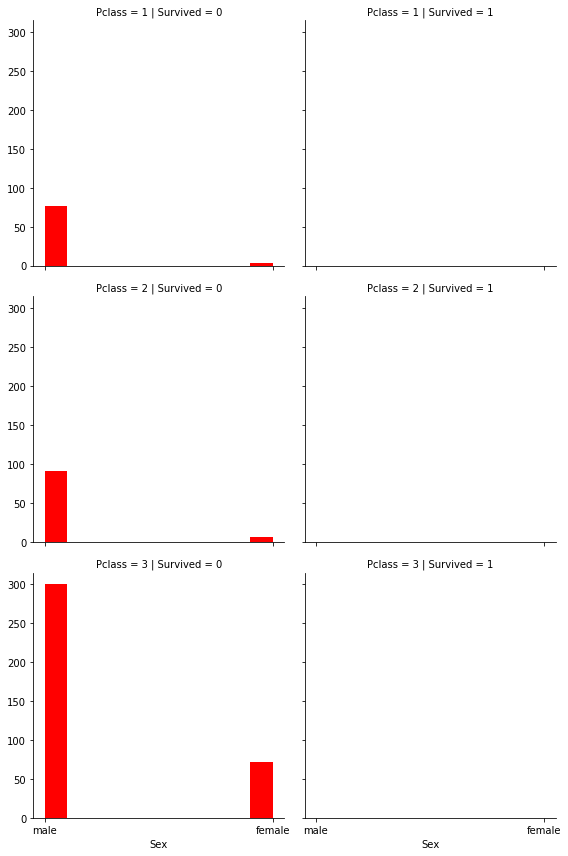

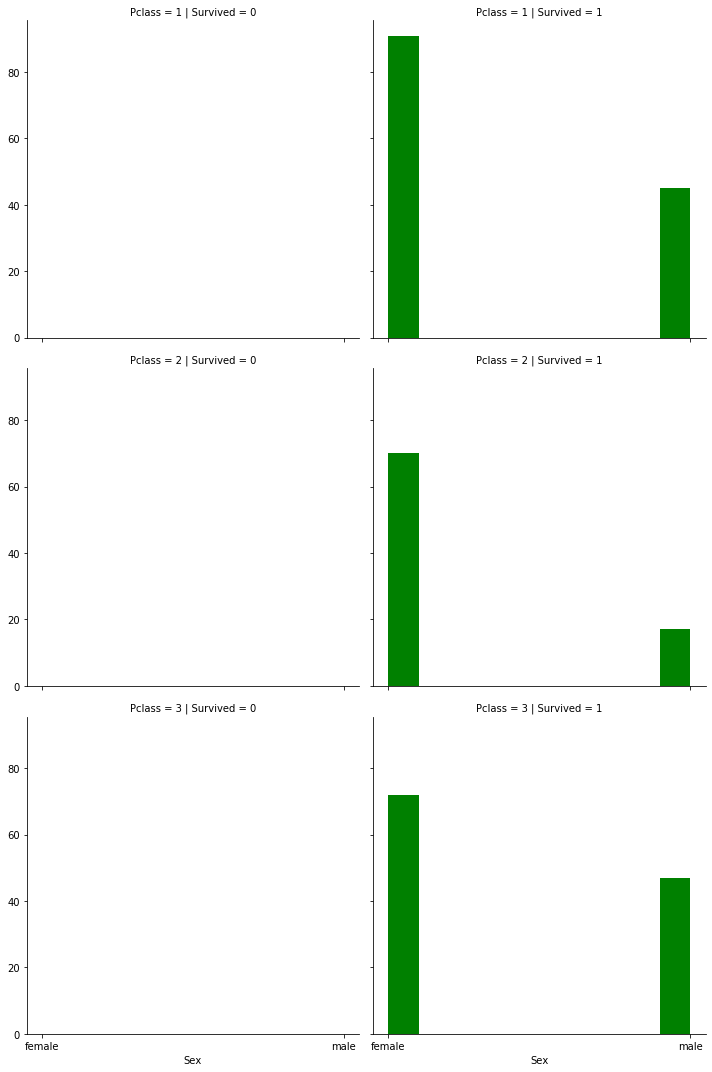

In [46]:
sns.FacetGrid(df_ns1, row = 'Pclass', col='Survived', height = 4).map(plt.hist, 'Sex', color="r")
sns.FacetGrid(df_s2, row = 'Pclass', col='Survived', height = 5).map(plt.hist, 'Sex', color='g')

Observations: Not Survived
1. Passengers who could not be survived are represented in Red Bar graph.
       
       Class     Male       Female      Total      Male % 
    
           1     77          3           80        96%
           2     91          6           97        93%
           3     300         72         372        80%
 
2. A total of 549 casualities, male leading in each class.

           

Observations: Survived

1. Passengers who were lucky enough to survive are represented in Green bar Graph.

        Class     Male       Female      Total      Female % 
           1     45          91           136       67%
           2     17          70            87       80%
           3     47          72           119       60%
 
2. A total of 342 people could survive, female leading survival rate in each class.

3. 233/342 which is 68.12% survival rate among females.

ValueError: Neither the `x` nor `y` variable appears to be numeric.

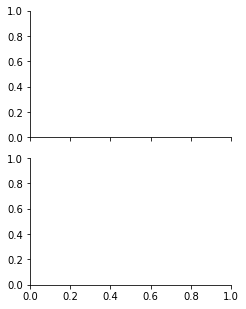

In [47]:
# Visualize Survived and Not Survived with respect to the 'Embarked' Column:

g = sns.FacetGrid(df, row='Survived', height=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Embarked', 'Sex',order = [1,2,3],hue_order=None,palette='deep')
g.add_legend()

Observations:

1. Males who embarked 'C' have higher chances of survival across all Pclass when compared to females.

2. Females who embarked 'Q' and 'S' have better chances of survival than Male across all Pclass.

3. Pclass 1 females have very high chances of survival.

4. Pclass 1 males also have high chances of srvival, if they have begin their journey from 'C'.


# Plot a Desnity Graph based on Fare and Survival Rate:



In [48]:
df.groupby('Survived') ['Fare'].value_counts()

Survived  Fare    
0         8.0500      38
          7.8958      37
          13.0000     26
          7.7500      22
          26.0000     16
                      ..
1         82.1708      1
          83.4750      1
          106.4250     1
          108.9000     1
          247.5208     1
Name: Fare, Length: 330, dtype: int64

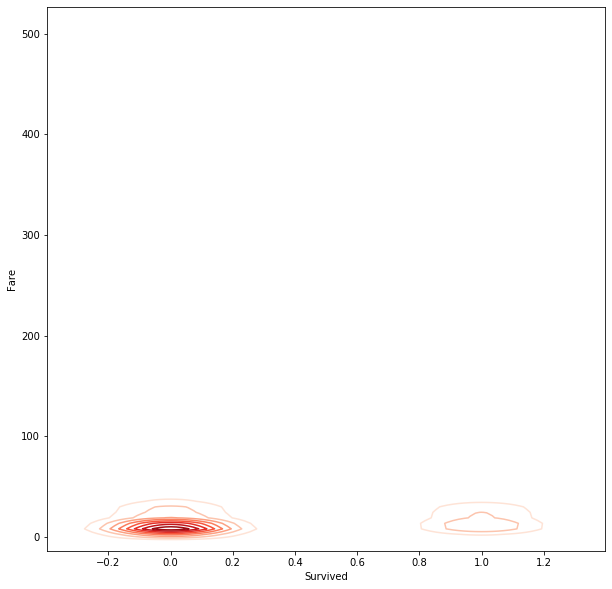

In [49]:
plt.figure(figsize=(10,10))
sns.kdeplot(df.Survived, df.Fare,
                  cmap="Reds", shade=False, shade_lowest=False)

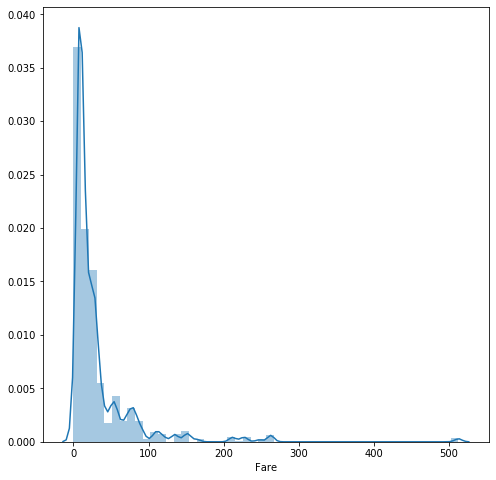

In [50]:
# Plot a Distplot based on Fare and Survival Rate:

plt.figure(figsize=(8,8))
sns.distplot(df['Fare'])
plt.show()

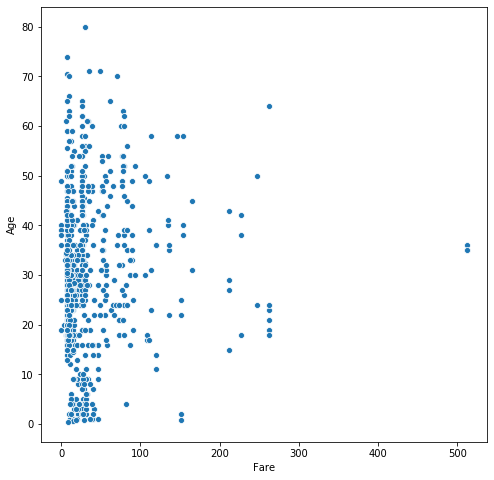

In [51]:
# How are "Age" and "Fare" Columns related? Plot a Graph for the same:

plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Fare', y = 'Age', data = df)

Observations:

1. Age is diversified from 0 to 80.
2. Fare is between 0 and 512.

3. Majority of people bought ticket less than 100.

4. A few outliers are present.

# Multivariate EDA:



In [52]:
# Does Age have an impact on Survival Rate for each Sex and Class group?


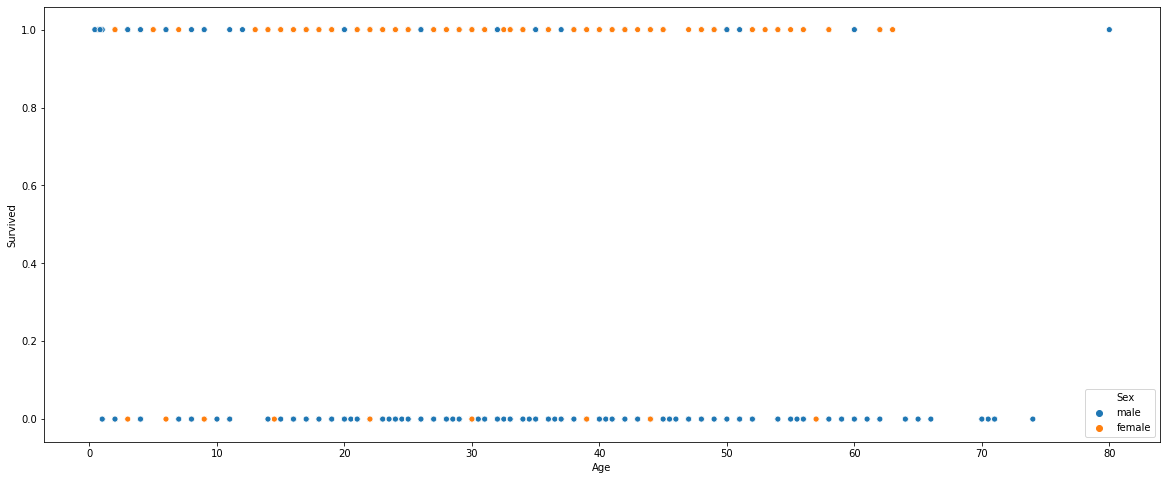

In [53]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'Age', y = 'Survived', hue = 'Sex',data = df,hue_order=None)

Observations: Age - Gender - Survived:

"Women and Children....first"

1. Lots of blue dots at 0 Survival point shows Males accounts for larger proportion of death.

2. Out of 549 Casualities - 466 i.e. 84.88% of all death are attributed to males.
    Rest 83 ~ 15% are Female casualities.

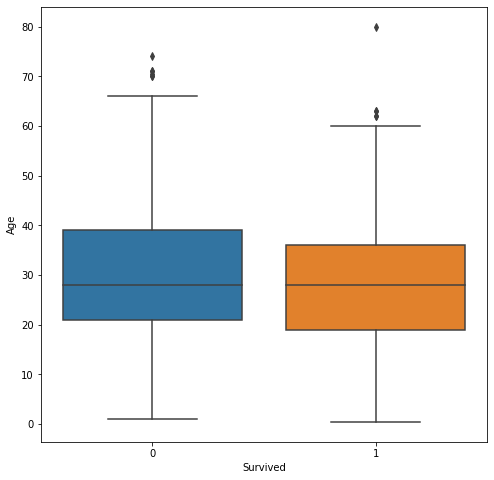

In [54]:
# Age vs Survived vs Gender 
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Survived', y = 'Age' , data = df)

#Curious:

1. Which age group is ideal to survive such incident.

2. Should ages be given weightage on survival possibility? 

#Check KDE plot for Age

In [55]:
df.groupby('Survived') ['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

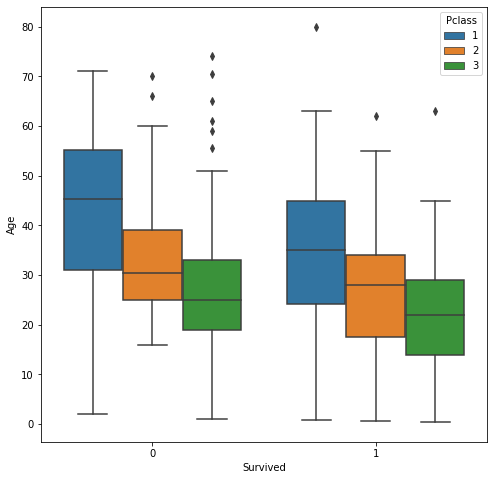

In [56]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Survived', y = 'Age' , hue = 'Pclass', data = df)

Observations:

1. Non - Survivability:
    
    -Passengers have died across all clases.
    
    -The age diversification of passengers belonging to class I and dying is higher than any other class.
    
2. Survivability :

    -The age diversification of passengers in classI and surviving is higher than class II or III
    
    -Survivability is negatively correlated with Class.

# Plot a HEATMAP showing the correlations between different features:


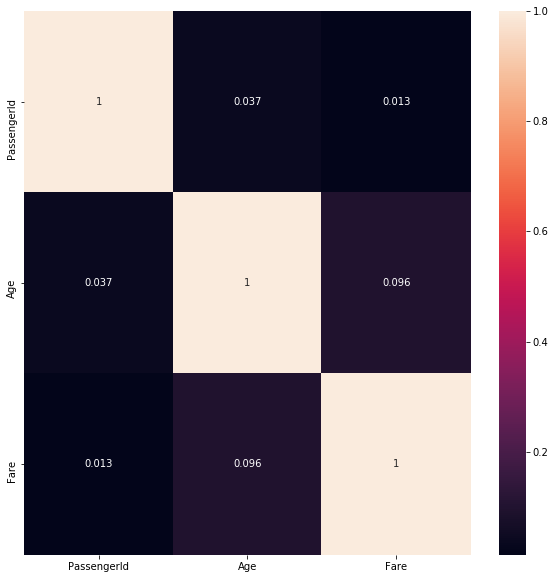

In [57]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot= True)

# Conclusion :

1. The overall objective of Doing this exercise is to predict the Survivability. i.e. if I were to board this ship today, what are the chances of survival?

2. Factors affecting chances of survival are:
  
          - Age
          
          - Pclass
          
          - SibSp
          
          - Fare
          
          - Sex
          
3. We look one by one at these factors w.r.t Survived:

    - Age shows a -.07 corr with Survived, which is low. Greater the age lower the chances of Survival.
    However, differnt age groups have different surviving and non surviving percentage.
    
    19 to 29 year old group is likely to survive than 
    
    
    - Pclass shows a -.55 corr with Survived, which means Chances of survival are in order - I>II>III
   

# Need help with the queries